# Document Similarity

### Introduction
This Jupyter Notebook provides hands-on demonstrations of how text data can be represented numerically using CountVectorizer. It shows how similarity between documents can be quantified using Cosine, Jaccard, and Euclidean metrics.

### Key Stages of the Notebook
<b>1. Importing the necessary Libraries</b><br>
Essential libraries for this implementation are:
- Pandas: Used to load and store text data in structured formats like DataFrames, which are easy to manage and process.
- Sklearn: Convert text into numerical formats using tools like CountVectorizer, TfidfVectorizer, etc.

<b> 2. Cosine Similarity</b><br>
- A metric used to measure how similar two text documents (or vectors) are by calculating the cosine of the angle between them.
- It is widely used in Natural Language Processing (NLP) for tasks like text classification, clustering, and information retrieval.
- Output 1: The vectors are identical (perfectly similar).
- Output 0: The vectors are orthogonal (no similarity).

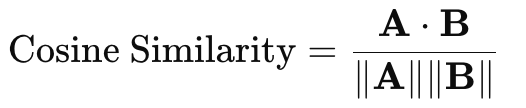

<b> 3. Jaccard Similarity</b><br>
- A metric used to measure the similarity between two sets. 
- In the context of text data, it compares the overlap between two sets of words or tokens (e.g., unique words in each document) relative to their combined set.
- Output 1: Perfect similarity (completely identical sets).
- Output 0: No similarity (no shared tokens).

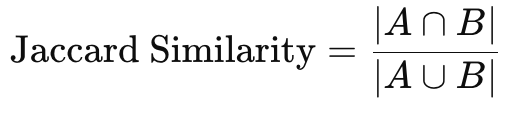

<b> 4. Euclidean Similarity</b><br>
- A measure of how far apart two points (vectors) are in a multi-dimensional space. 
- In the context of text data, it computes the straight-line distance between two text representations (e.g., vectors created using techniques like bag-of-words, TF-IDF, or word embeddings).
- Small Distance: Indicates high similarity (closer vectors).
- Large Distance: Indicates low similarity (vectors farther apart).

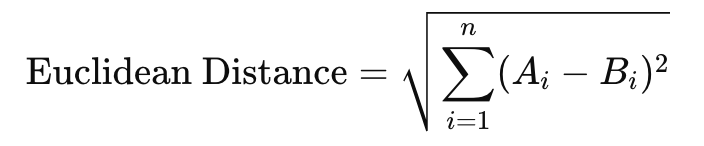

### Learning Outcome
Upon completion of this Notebook, students will be able to
- Understand the mathematical foundations and differences between the metrics: Cosine, Jaccard and Euclidean
- Understand how to prepare text data for similarity calculations.<br>
    a. Tokenization<br>
    b. Converting text into numerical representations.<br>
- Analyze the results produced by different similarity metrics 

## What kind of AI Projects would this Jupyter Notebook extend to?
This code provides a foundation for the following types of AI projects:
- <b>Document clustering</b>: Grouping similar documents together based on their content or features.
- <b>Duplicate content detection</b>: Identifying and flagging identical or nearly identical text across documents.
- <b>Recommendation systems</b>: Suggesting relevant items, based on user preferences or similarities.
- <b>Information retrieval</b>:Fetching relevant information or documents from a large dataset in response to a query.

### Content Flow
An outline of the tasks performed in this Python implementation:
1. [Import the Libraries](#import-the-libraries)
2. [Cosine Similarity](#cosine-similary)
    - [Comparing three documents concurrently](#comparing-three-documents-concurrently)
3. [Jaccard Similarity](#jaccard-similarity)
4. [Euclidean Similarity](#euclidean-similarity)

### Time Required
It would take about an hour to complete the process discussed in this notebook. Follow the instructions and go through the additional explanations in this Notebook for easier execution.

### Hardware Requirement:
Any computer with access to internet and web browser.

# Import the Libraries

In [1]:
#Libraries necessary for all the tasks in this implementation
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#Library necessary for Cosine Similarity
from sklearn.metrics.pairwise import cosine_similarity

#Library necessary for Euclidean Similarity
from sklearn.metrics.pairwise import euclidean_distances

# Cosine Similary
- Cosine similarity is a metric used to measure how similar 2 documents are 
- Mathematically, it measures the cosine of the angle between two vectors projected in a multi-dimensional space. 
- The smaller the angle, higher the cosine similarity.

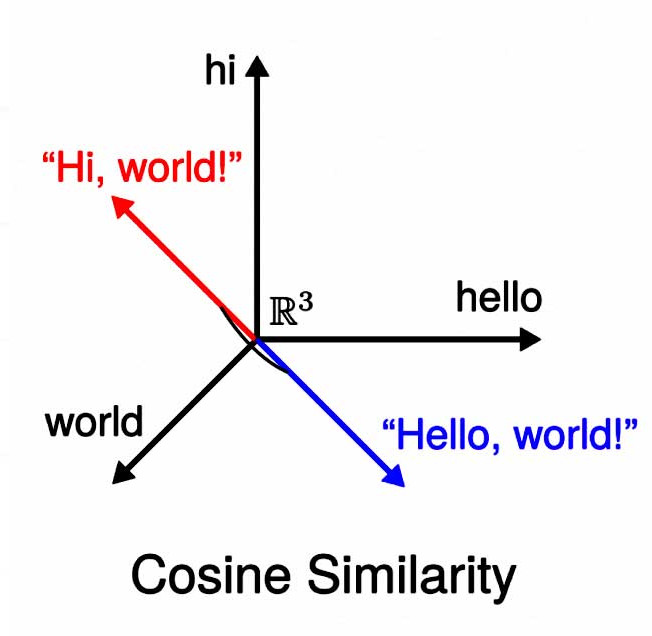

In [2]:
#Define the input texts
doc_1 = "Brazil won the Football world cup five times" 
doc_2 = "Italy comes after Brazil in that regard" 

The following code block transforms two text documents (doc_1 and doc_2) into numerical vectors (vectorA and vectorB) using CountVectorizer. 

*ngram_range=(1, 1)* specifies that only unigrams (individual words) should be considered. 

In [3]:
#Find the bag of word vector representation
CountVec = CountVectorizer(ngram_range=(1,1))
Count_data = CountVec.fit_transform(sentence for sentence in [doc_1, doc_2])
vectorA = Count_data.toarray()[0]
vectorB = Count_data.toarray()[1]

In [4]:
#Use the cosine_similarity function to calculate cosine distance like this
cosine_similarity_matrix = cosine_similarity(Count_data)
pd.DataFrame(cosine_similarity_matrix,['doc_1','doc_2'])

,0,1
doc_1,1.000000,0.133631
doc_2,0.133631,1.000000


Observe the similarity between document 1 and 2 is 0.133631.

The value in the first position displays the similarity between Doc_1 to itself, hence the value is 1.000000

The value in the second column first row indicates the similarity between Doc_1 and Doc_2.

Similarly, the value in the second row first column indicates the similarity between Doc_2 and Doc_1. Hence these two values are exactly the same 0.133631.

The value in the second row second column indicates the similarity between Doc_2 and Doc_2, hence the value is 1.000000

Now, let's try to find similarities between three text inputs in pairs.

In [5]:
doc_1 = "Sweden is in Scandanavia" 
doc_2 = "Denmark is a neighbor of Sweden" 
doc_3 = "Norway and Denmark are close by"

In [6]:
CountVec = CountVectorizer(ngram_range=(1,1))
Count_data = CountVec.fit_transform(sentence for sentence in [doc_1, doc_2])
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity_matrix = cosine_similarity(Count_data)
pd.DataFrame(cosine_similarity_matrix,['doc_1','doc_2'])

,0,1
doc_1,1.000000,0.447214
doc_2,0.447214,1.000000


In [7]:
CountVec = CountVectorizer(ngram_range=(1,1))
Count_data = CountVec.fit_transform(sentence for sentence in [doc_2, doc_3])
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity_matrix = cosine_similarity(Count_data)
pd.DataFrame(cosine_similarity_matrix,['doc_2','doc_3'])

,0,1
doc_2,1.000000,0.182574
doc_3,0.182574,1.000000


In [8]:
CountVec = CountVectorizer(ngram_range=(1,1))
Count_data = CountVec.fit_transform(sentence for sentence in [doc_1, doc_3])
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity_matrix = cosine_similarity(Count_data)
pd.DataFrame(cosine_similarity_matrix,['doc_1','doc_3'])

,0,1
doc_1,1.0,0.0
doc_3,0.0,1.0


Observe that the texts 1 and 3 are not similar at all.

Next, let's try to find similarity between three texts together instead of analyzing it in pairs.

## Comparing three documents concurrently

In [9]:
# Define the documents
doc_football = "Football is a family of team sports that involve, to varying degrees, kicking a ball to score a goal. Unqualified, the word football normally means the form of football that is the most popular where the word is used."
doc_soccer = "Soccer is a team sport played with a spherical ball between two teams of 11 players. It is played by approximately 250 million players in over 200 countries and dependencies, making it the world's most popular sport. The game is played on a rectangular field called a pitch with a goal at each end."
doc_cricket = "Cricket is a bat-and-ball game played between two teams of eleven players on a field at the centre of which is a 22-yard (20-metre) pitch with a wicket at each end, each comprising two bails balanced on three stumps."

In [10]:
#List of documents
documents = [doc_football, doc_soccer, doc_cricket]

In [11]:
# Create the Document Term Matrix
count_vectorizer = CountVectorizer()
sparse_matrix = count_vectorizer.fit_transform(documents)

The code blok below converts a sparse matrix of document-term relationships into a readable and interpretable format using a Pandas DataFrame. 

It converts the sparse matrix (e.g., created using CountVectorizer) into a dense format that contains the actual numerical values. 

Assigns descriptive names to the rows and columns to make the data easier to interpret.

In [12]:
doc_term_matrix = sparse_matrix.todense()
df = pd.DataFrame(doc_term_matrix, columns=count_vectorizer.get_feature_names_out(), 
                  index=['doc_football', 'doc_soccer', 'doc_cricket'])
df

,11,20,200,22,250,and,approximately,at,bails,balanced,...,unqualified,used,varying,where,which,wicket,with,word,world,yard
doc_football,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,0,0,0,2,0,0
doc_soccer,1,0,1,0,1,1,1,1,0,0,...,0,0,0,0,0,0,2,0,1,0
doc_cricket,0,1,0,1,0,1,0,2,1,1,...,0,0,0,0,1,1,1,0,0,1


In [13]:
#Print the cosine similarity
print(cosine_similarity(df, df))

[[1.         0.3454042  0.25471335]
 [0.3454042  1.         0.54840282]
 [0.25471335 0.54840282 1.        ]]


The presence of 1 in the diagonal indicates the similarity estimated for each document to itself.

From the output, it is evident that the texts 2 and 3 has 54% similarity in comparison.

# Jaccard Similarity

- Jaccard Similarity is also known as the Jaccard index and Intersection over Union 
- used to determine the similarity between two text document in terms of their context 
- similarity is in terms of how many common words are exist over total words

![Image](https://miro.medium.com/max/744/1*XiLRKr_Bo-VdgqVI-SvSQg.png)

More here: https://en.wikipedia.org/wiki/Jaccard_index

In [14]:
# Define the documents
doc_1 = "Data is the new oil of the digital economy"
doc_2 = "Data is a new oil"

In [15]:
#convert documents to lower case
doc_1 = doc_1.lower()
doc_2 = doc_2.lower()

In [16]:
#Extract individual words
words1 = doc_1.split(' ')
words1 = set(words1)
print("Words 1: ", words1)
words2 = doc_2.split(' ')
words2 = set(words2)
print("Words 2: ", words2)

Words 1:  {'oil', 'is', 'the', 'economy', 'data', 'new', 'of', 'digital'}
Words 2:  {'oil', 'is', 'data', 'new', 'a'}


In [17]:
#Get the unique words from the documents
intersection = words1.intersection(words2)
print("The common words in the documents are: ", intersection)
union = words1.union(words2)
print("The unique words in the documents are: ", union)

The common words in the documents are:  {'data', 'new', 'is', 'oil'}
The unique words in the documents are:  {'oil', 'is', 'the', 'economy', 'data', 'new', 'of', 'a', 'digital'}


In [18]:
#Jaccard Similarity Score
float(len(intersection)) / len(union)

0.4444444444444444

Observe the two input texts are 44% similar as estimated by Jaccard Similarity metric.

# Euclidean Similarity

In [19]:
#Define two sample texts
text1 = "I love natural language processing"
text2 = "Natural language processing is amazing"

In [20]:
#Convert texts into word frequency vectors
vectorizer = CountVectorizer()
vectors = vectorizer.fit_transform([text1, text2])
freq = vectorizer.fit_transform([text1, text2]).toarray()
freq

array([[0, 0, 1, 1, 1, 1],
       [1, 1, 1, 0, 1, 1]], dtype=int64)

In [21]:
#Calculate the Euclidean distance between the vectors
distance = euclidean_distances(vectors[0], vectors[1])
print(distance)

[[1.73205081]]


In [22]:
# Step 5: Print the results
freq = vectorizer.fit_transform([text1, text2]).toarray()
print("Word Frequency Vectors:")
print(freq)
print("\nEuclidean Distance:", distance)

Word Frequency Vectors:
[[0 0 1 1 1 1]
 [1 1 1 0 1 1]]

Euclidean Distance: [[1.73205081]]


Notice that the input texts are somewhat similar, as the attained Euclidean distance value is very small.

### Observations:
- A cosine similarity matrix is generated for the document pairs, which shows how similar the documents are in terms of their vector representation.
- After running the code for several document pairs, the matrix output shows values between 0 (completely dissimilar) and 1 (completely similar).
- The CountVectorizer creates a vector representation of each document based on the frequency of words.
- The Document-Term Matrix is created and displayed using Pandas DataFrame. Each row corresponds to a document, and each column corresponds to a term, with values showing the frequency of that term in the document.
- Jaccard similarity is calculated by splitting the documents into words, converting them to sets, and then finding the intersection and union of the words.
- The Euclidean distance between the word frequency vectors of two documents is calculated using euclidean_distances() from sklearn.
- This measures how "far apart" the two vectors are, where a smaller value indicates more similarity (closer vectors), and a larger value indicates greater dissimilarity.
- This code can be adapted for various NLP tasks, such as document clustering, search, and recommendation.